
# Overfitting


In [128]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint

import os

np.random.seed(1)




## Generate test data

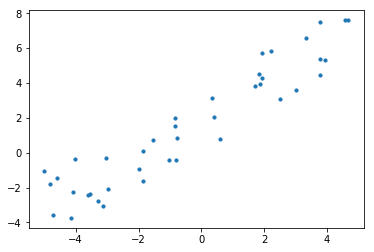

In [121]:
n = 40
beta = 10
add = -5
noise = 4
x = np.random.random(n) * beta + add
x = np.sort(x)
y = x + np.random.random(n) * noise

plt.scatter(x, y, s = 10)




## Normalization


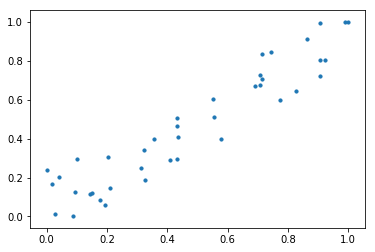

In [122]:
dataset = np.transpose(np.array([x,y]))

scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

plt.scatter(dataset_scaled[:,0], dataset_scaled[:,1], s = 10)
       




## Split in training and test dataset

Training dataset will adapt model parameters.

Test parameter set is used to check model quality.

Test dataset should only be used once!



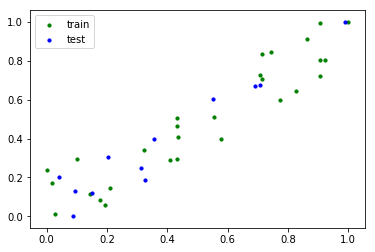

In [123]:
train, test = train_test_split(dataset_scaled, train_size = 0.7, test_size = 0.3)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train[:,0], train[:,1], s = 10, c = "green", label = "train")
ax1.scatter(test[:,0], test[:,1], s = 10, c = "blue", label = "test")
plt.legend(loc='upper left');
plt.show()


       

## Training model

In [124]:
act = 'relu'
nodes = 40
model = Sequential()

model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))
model.add(Dense(nodes, activation = act, input_dim = 1))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_273 (Dense)            (None, 40)                80        
_________________________________________________________________
dense_274 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_275 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_276 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_277 (Dense)            (None, 1)                 41        
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [129]:
x = train[:,0]
y = train[:,1]

index = np.random.randint(0, len(x), round(0.8 * len(x)))
        
x_t = x[index]
y_t = y[index]
         
mask = np.ones(len(x),dtype=bool) #np.ones_like(a,dtype=bool)
mask[index] = False
         
x_val = x[mask]
y_val = y[mask]

epochs = 4000

for root, dirs, files in os.walk("../../models/"):
        for f in files:
            os.unlink(os.path.join(root,f))
            
filepath_train = "../../models/train-weights-improvement-{epoch:02d}.hdf5"
filepath_val = "../../models/val-weights-improvement-{epoch:02d}.hdf5"

checkpoint_train_loss = ModelCheckpoint(filepath_train, 
                             monitor = 'loss', 
                             verbose = 1,
                             save_best_only = True, 
                             mode = 'min')

checkpoint_val_loss = ModelCheckpoint(filepath_val, 
                             monitor = 'val_loss', 
                             verbose = 1,
                             save_best_only = True, 
                             mode = 'min')



callbacks_list = [checkpoint_train_loss, checkpoint_val_loss]

history = model.fit(x_t, y_t, 
                    epochs = epochs,
                    batch_size = 1, 
                    validation_data = (x_val, y_val), 
                    callbacks = callbacks_list)

Train on 22 samples, validate on 13 samples
Epoch 1/4000
22/22 [==============================] - 3s 152ms/step - loss: 0.1076 - acc: 0.0000e+00 - val_loss: 0.0616 - val_acc: 0.0000e+00

Epoch 00001: loss improved from inf to 0.10756, saving model to ../../models/train-weights-improvement-01.hdf5

Epoch 00001: val_loss improved from inf to 0.06156, saving model to ../../models/val-weights-improvement-01.hdf5
Epoch 2/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0934 - acc: 0.0455 - val_loss: 0.0582 - val_acc: 0.0000e+00

Epoch 00002: loss improved from 0.10756 to 0.09344, saving model to ../../models/train-weights-improvement-02.hdf5

Epoch 00002: val_loss improved from 0.06156 to 0.05820, saving model to ../../models/val-weights-improvement-02.hdf5
Epoch 3/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0772 - acc: 0.0455 - val_loss: 0.0524 - val_acc: 0.0000e+00

Epoch 00003: loss improved from 0.09344 to 0.07718, saving model to ../../models/

22/22 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 0.0455 - val_loss: 0.0236 - val_acc: 0.0000e+00

Epoch 00029: loss improved from 0.00933 to 0.00914, saving model to ../../models/train-weights-improvement-29.hdf5

Epoch 00029: val_loss did not improve from 0.01065
Epoch 30/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0096 - acc: 0.0455 - val_loss: 0.0121 - val_acc: 0.0000e+00

Epoch 00030: loss did not improve from 0.00914

Epoch 00030: val_loss did not improve from 0.01065
Epoch 31/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0123 - acc: 0.0455 - val_loss: 0.0250 - val_acc: 0.0000e+00

Epoch 00031: loss did not improve from 0.00914

Epoch 00031: val_loss did not improve from 0.01065
Epoch 32/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0107 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 00032: loss did not improve from 0.00914

Epoch 00032: val_loss did not improve from 0.0106

22/22 [==============================] - 0s 3ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 00062: loss did not improve from 0.00815

Epoch 00062: val_loss did not improve from 0.01065
Epoch 63/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 00063: loss did not improve from 0.00815

Epoch 00063: val_loss did not improve from 0.01065
Epoch 64/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0095 - acc: 0.0455 - val_loss: 0.0174 - val_acc: 0.0000e+00

Epoch 00064: loss did not improve from 0.00815

Epoch 00064: val_loss did not improve from 0.01065
Epoch 65/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0455 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 00065: loss did not improve from 0.00815

Epoch 00065: val_loss did not improve from 0.01065
Epoch 66/4000
22/22 [==============================] - 0s 3ms/step

22/22 [==============================] - 0s 3ms/step - loss: 0.0090 - acc: 0.0455 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 00096: loss did not improve from 0.00805

Epoch 00096: val_loss did not improve from 0.01065
Epoch 97/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0168 - val_acc: 0.0000e+00

Epoch 00097: loss did not improve from 0.00805

Epoch 00097: val_loss did not improve from 0.01065
Epoch 98/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 00098: loss did not improve from 0.00805

Epoch 00098: val_loss did not improve from 0.01065
Epoch 99/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 00099: loss did not improve from 0.00805

Epoch 00099: val_loss did not improve from 0.01065
Epoch 100/4000
22/22 [==============================] - 0s 3ms/ste

22/22 [==============================] - 0s 3ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0178 - val_acc: 0.0000e+00

Epoch 00130: loss did not improve from 0.00798

Epoch 00130: val_loss did not improve from 0.01065
Epoch 131/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0089 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 00131: loss did not improve from 0.00798

Epoch 00131: val_loss did not improve from 0.01065
Epoch 132/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0184 - val_acc: 0.0000e+00

Epoch 00132: loss did not improve from 0.00798

Epoch 00132: val_loss did not improve from 0.01065
Epoch 133/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0184 - val_acc: 0.0000e+00

Epoch 00133: loss did not improve from 0.00798

Epoch 00133: val_loss did not improve from 0.01065
Epoch 134/4000
22/22 [==============================] - 0s 3ms/


Epoch 00164: loss did not improve from 0.00798

Epoch 00164: val_loss did not improve from 0.01065
Epoch 165/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0089 - acc: 0.0455 - val_loss: 0.0166 - val_acc: 0.0000e+00

Epoch 00165: loss did not improve from 0.00798

Epoch 00165: val_loss did not improve from 0.01065
Epoch 166/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0269 - val_acc: 0.0000e+00

Epoch 00166: loss did not improve from 0.00798

Epoch 00166: val_loss did not improve from 0.01065
Epoch 167/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0090 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 00167: loss did not improve from 0.00798

Epoch 00167: val_loss did not improve from 0.01065
Epoch 168/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 00168: loss did not improve from 0.00798


22/22 [==============================] - 0s 3ms/step - loss: 0.0124 - acc: 0.0455 - val_loss: 0.0244 - val_acc: 0.0000e+00

Epoch 00199: loss did not improve from 0.00798

Epoch 00199: val_loss did not improve from 0.01065
Epoch 200/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0157 - val_acc: 0.0000e+00

Epoch 00200: loss did not improve from 0.00798

Epoch 00200: val_loss did not improve from 0.01065
Epoch 201/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0236 - val_acc: 0.0000e+00

Epoch 00201: loss did not improve from 0.00798

Epoch 00201: val_loss did not improve from 0.01065
Epoch 202/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00202: loss did not improve from 0.00798

Epoch 00202: val_loss did not improve from 0.01065
Epoch 203/4000
22/22 [==============================] - 0s 3ms/


Epoch 00233: loss did not improve from 0.00798

Epoch 00233: val_loss did not improve from 0.01065
Epoch 234/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 00234: loss did not improve from 0.00798

Epoch 00234: val_loss did not improve from 0.01065
Epoch 235/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 0.0455 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 00235: loss did not improve from 0.00798

Epoch 00235: val_loss did not improve from 0.01065
Epoch 236/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 00236: loss did not improve from 0.00798

Epoch 00236: val_loss did not improve from 0.01065
Epoch 237/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 00237: loss did not improve from 0.00798


22/22 [==============================] - 0s 3ms/step - loss: 0.0087 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 00268: loss did not improve from 0.00798

Epoch 00268: val_loss did not improve from 0.01065
Epoch 269/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0088 - acc: 0.0455 - val_loss: 0.0215 - val_acc: 0.0000e+00

Epoch 00269: loss did not improve from 0.00798

Epoch 00269: val_loss did not improve from 0.01065
Epoch 270/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0088 - acc: 0.0455 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 00270: loss did not improve from 0.00798

Epoch 00270: val_loss did not improve from 0.01065
Epoch 271/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 00271: loss did not improve from 0.00798

Epoch 00271: val_loss did not improve from 0.01065
Epoch 272/4000
22/22 [==============================] - 0s 3ms/


Epoch 00302: loss did not improve from 0.00798

Epoch 00302: val_loss did not improve from 0.01065
Epoch 303/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0088 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00303: loss did not improve from 0.00798

Epoch 00303: val_loss did not improve from 0.01065
Epoch 304/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 00304: loss did not improve from 0.00798

Epoch 00304: val_loss did not improve from 0.01065
Epoch 305/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 00305: loss did not improve from 0.00798

Epoch 00305: val_loss did not improve from 0.01065
Epoch 306/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 00306: loss did not improve from 0.00798


22/22 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 00337: loss did not improve from 0.00798

Epoch 00337: val_loss did not improve from 0.01065
Epoch 338/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0197 - val_acc: 0.0000e+00

Epoch 00338: loss did not improve from 0.00798

Epoch 00338: val_loss did not improve from 0.01065
Epoch 339/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 00339: loss did not improve from 0.00798

Epoch 00339: val_loss did not improve from 0.01065
Epoch 340/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 00340: loss did not improve from 0.00798

Epoch 00340: val_loss did not improve from 0.01065
Epoch 341/4000
22/22 [==============================] - 0s 3ms/


Epoch 00371: loss did not improve from 0.00798

Epoch 00371: val_loss did not improve from 0.01065
Epoch 372/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0099 - acc: 0.0455 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00372: loss did not improve from 0.00798

Epoch 00372: val_loss did not improve from 0.01065
Epoch 373/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0093 - acc: 0.0455 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 00373: loss did not improve from 0.00798

Epoch 00373: val_loss did not improve from 0.01065
Epoch 374/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 00374: loss did not improve from 0.00798

Epoch 00374: val_loss did not improve from 0.01065
Epoch 375/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0178 - val_acc: 0.0000e+00

Epoch 00375: loss did not improve from 0.00798


22/22 [==============================] - 0s 3ms/step - loss: 0.0090 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 00406: loss did not improve from 0.00798

Epoch 00406: val_loss did not improve from 0.01065
Epoch 407/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 0.0455 - val_loss: 0.0210 - val_acc: 0.0000e+00

Epoch 00407: loss did not improve from 0.00798

Epoch 00407: val_loss did not improve from 0.01065
Epoch 408/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0086 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 00408: loss did not improve from 0.00798

Epoch 00408: val_loss did not improve from 0.01065
Epoch 409/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 0.0455 - val_loss: 0.0186 - val_acc: 0.0000e+00

Epoch 00409: loss did not improve from 0.00798

Epoch 00409: val_loss did not improve from 0.01065
Epoch 410/4000
22/22 [==============================] - 0s 3ms/


Epoch 00440: loss did not improve from 0.00798

Epoch 00440: val_loss did not improve from 0.01065
Epoch 441/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00441: loss did not improve from 0.00798

Epoch 00441: val_loss did not improve from 0.01065
Epoch 442/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 00442: loss did not improve from 0.00798

Epoch 00442: val_loss did not improve from 0.01065
Epoch 443/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0089 - acc: 0.0455 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 00443: loss did not improve from 0.00798

Epoch 00443: val_loss did not improve from 0.01065
Epoch 444/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0095 - acc: 0.0455 - val_loss: 0.0228 - val_acc: 0.0000e+00

Epoch 00444: loss did not improve from 0.00798


22/22 [==============================] - 0s 4ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 00475: loss did not improve from 0.00798

Epoch 00475: val_loss did not improve from 0.01065
Epoch 476/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0217 - val_acc: 0.0000e+00

Epoch 00476: loss did not improve from 0.00798

Epoch 00476: val_loss did not improve from 0.01065
Epoch 477/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 00477: loss did not improve from 0.00798

Epoch 00477: val_loss did not improve from 0.01065
Epoch 478/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0178 - val_acc: 0.0000e+00

Epoch 00478: loss did not improve from 0.00798

Epoch 00478: val_loss did not improve from 0.01065
Epoch 479/4000
22/22 [==============================] - 0s 4ms/


Epoch 00509: loss did not improve from 0.00798

Epoch 00509: val_loss did not improve from 0.01065
Epoch 510/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 00510: loss did not improve from 0.00798

Epoch 00510: val_loss did not improve from 0.01065
Epoch 511/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 0.0455 - val_loss: 0.0197 - val_acc: 0.0000e+00

Epoch 00511: loss improved from 0.00798 to 0.00797, saving model to ../../models/train-weights-improvement-511.hdf5

Epoch 00511: val_loss did not improve from 0.01065
Epoch 512/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 00512: loss did not improve from 0.00797

Epoch 00512: val_loss did not improve from 0.01065
Epoch 513/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0217 -

22/22 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 00544: loss did not improve from 0.00797

Epoch 00544: val_loss did not improve from 0.01065
Epoch 545/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0088 - acc: 0.0455 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 00545: loss did not improve from 0.00797

Epoch 00545: val_loss did not improve from 0.01065
Epoch 546/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 00546: loss did not improve from 0.00797

Epoch 00546: val_loss did not improve from 0.01065
Epoch 547/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0177 - val_acc: 0.0000e+00

Epoch 00547: loss improved from 0.00797 to 0.00793, saving model to ../../models/train-weights-improvement-547.hdf5

Epoch 00547: val_loss did not improve from 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 00578: loss improved from 0.00793 to 0.00791, saving model to ../../models/train-weights-improvement-578.hdf5

Epoch 00578: val_loss did not improve from 0.01065
Epoch 579/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 00579: loss did not improve from 0.00791

Epoch 00579: val_loss did not improve from 0.01065
Epoch 580/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 00580: loss did not improve from 0.00791

Epoch 00580: val_loss did not improve from 0.01065
Epoch 581/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 00581: loss did not improve from 0.00791

Epoch 00581: val_loss did not improve from 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 00612: loss did not improve from 0.00787

Epoch 00612: val_loss did not improve from 0.01065
Epoch 613/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0078 - acc: 0.0455 - val_loss: 0.0229 - val_acc: 0.0000e+00

Epoch 00613: loss improved from 0.00787 to 0.00783, saving model to ../../models/train-weights-improvement-613.hdf5

Epoch 00613: val_loss did not improve from 0.01065
Epoch 614/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 0.0455 - val_loss: 0.0185 - val_acc: 0.0000e+00

Epoch 00614: loss did not improve from 0.00783

Epoch 00614: val_loss did not improve from 0.01065
Epoch 615/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 00615: loss did not improve from 0.00783

Epoch 00615: val_loss did not improve from 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 00646: loss did not improve from 0.00776

Epoch 00646: val_loss did not improve from 0.01065
Epoch 647/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 00647: loss did not improve from 0.00776

Epoch 00647: val_loss did not improve from 0.01065
Epoch 648/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 00648: loss did not improve from 0.00776

Epoch 00648: val_loss did not improve from 0.01065
Epoch 649/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 00649: loss did not improve from 0.00776

Epoch 00649: val_loss did not improve from 0.01065
Epoch 650/4000
22/22 [==============================] - 0s 3ms/

22/22 [==============================] - 0s 4ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 00680: loss did not improve from 0.00765

Epoch 00680: val_loss did not improve from 0.01065
Epoch 681/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 00681: loss did not improve from 0.00765

Epoch 00681: val_loss did not improve from 0.01065
Epoch 682/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 00682: loss did not improve from 0.00765

Epoch 00682: val_loss did not improve from 0.01065
Epoch 683/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - acc: 0.0455 - val_loss: 0.0185 - val_acc: 0.0000e+00

Epoch 00683: loss did not improve from 0.00765

Epoch 00683: val_loss did not improve from 0.01065
Epoch 684/4000
22/22 [==============================] - 0s 3ms/

22/22 [==============================] - 0s 3ms/step - loss: 0.0077 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00714: loss did not improve from 0.00755

Epoch 00714: val_loss did not improve from 0.01065
Epoch 715/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0078 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 00715: loss did not improve from 0.00755

Epoch 00715: val_loss did not improve from 0.01065
Epoch 716/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 00716: loss did not improve from 0.00755

Epoch 00716: val_loss did not improve from 0.01065
Epoch 717/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0078 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 00717: loss did not improve from 0.00755

Epoch 00717: val_loss did not improve from 0.01065
Epoch 718/4000
22/22 [==============================] - 0s 3ms/


Epoch 00748: loss did not improve from 0.00755

Epoch 00748: val_loss did not improve from 0.01065
Epoch 749/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 00749: loss did not improve from 0.00755

Epoch 00749: val_loss did not improve from 0.01065
Epoch 750/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0215 - val_acc: 0.0000e+00

Epoch 00750: loss did not improve from 0.00755

Epoch 00750: val_loss did not improve from 0.01065
Epoch 751/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 0.0455 - val_loss: 0.0217 - val_acc: 0.0000e+00

Epoch 00751: loss did not improve from 0.00755

Epoch 00751: val_loss did not improve from 0.01065
Epoch 752/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 0.0455 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 00752: loss did not improve from 0.00755


22/22 [==============================] - 0s 3ms/step - loss: 0.0083 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 00783: loss did not improve from 0.00748

Epoch 00783: val_loss did not improve from 0.01065
Epoch 784/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0077 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 00784: loss did not improve from 0.00748

Epoch 00784: val_loss did not improve from 0.01065
Epoch 785/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0076 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 00785: loss did not improve from 0.00748

Epoch 00785: val_loss did not improve from 0.01065
Epoch 786/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 00786: loss did not improve from 0.00748

Epoch 00786: val_loss did not improve from 0.01065
Epoch 787/4000
22/22 [==============================] - 0s 3ms/

22/22 [==============================] - 0s 3ms/step - loss: 0.0074 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 00816: loss did not improve from 0.00719

Epoch 00816: val_loss did not improve from 0.01065
Epoch 817/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0073 - acc: 0.0455 - val_loss: 0.0215 - val_acc: 0.0000e+00

Epoch 00817: loss did not improve from 0.00719

Epoch 00817: val_loss did not improve from 0.01065
Epoch 818/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0077 - acc: 0.0455 - val_loss: 0.0186 - val_acc: 0.0000e+00

Epoch 00818: loss did not improve from 0.00719

Epoch 00818: val_loss did not improve from 0.01065
Epoch 819/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 00819: loss improved from 0.00719 to 0.00683, saving model to ../../models/train-weights-improvement-819.hdf5

Epoch 00819: val_loss did not improve from 0.

22/22 [==============================] - 0s 5ms/step - loss: 0.0073 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 00849: loss did not improve from 0.00664

Epoch 00849: val_loss did not improve from 0.01065
Epoch 850/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0075 - acc: 0.0455 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 00850: loss did not improve from 0.00664

Epoch 00850: val_loss did not improve from 0.01065
Epoch 851/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 00851: loss improved from 0.00664 to 0.00658, saving model to ../../models/train-weights-improvement-851.hdf5

Epoch 00851: val_loss did not improve from 0.01065
Epoch 852/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 00852: loss did not improve from 0.00658

Epoch 00852: val_loss did not improve from 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 00882: loss did not improve from 0.00596

Epoch 00882: val_loss did not improve from 0.01065
Epoch 883/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0071 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 00883: loss did not improve from 0.00596

Epoch 00883: val_loss did not improve from 0.01065
Epoch 884/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 00884: loss did not improve from 0.00596

Epoch 00884: val_loss did not improve from 0.01065
Epoch 885/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 00885: loss did not improve from 0.00596

Epoch 00885: val_loss did not improve from 0.01065
Epoch 886/4000
22/22 [==============================] - 0s 3ms/

22/22 [==============================] - 0s 3ms/step - loss: 0.0060 - acc: 0.0455 - val_loss: 0.0234 - val_acc: 0.0000e+00

Epoch 00916: loss did not improve from 0.00589

Epoch 00916: val_loss did not improve from 0.01065
Epoch 917/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 00917: loss did not improve from 0.00589

Epoch 00917: val_loss did not improve from 0.01065
Epoch 918/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0060 - acc: 0.0455 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 00918: loss did not improve from 0.00589

Epoch 00918: val_loss did not improve from 0.01065
Epoch 919/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0062 - acc: 0.0455 - val_loss: 0.0259 - val_acc: 0.0000e+00

Epoch 00919: loss did not improve from 0.00589

Epoch 00919: val_loss did not improve from 0.01065
Epoch 920/4000
22/22 [==============================] - 0s 3ms/

22/22 [==============================] - 0s 4ms/step - loss: 0.0053 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 00949: loss did not improve from 0.00518

Epoch 00949: val_loss did not improve from 0.01065
Epoch 950/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 00950: loss did not improve from 0.00518

Epoch 00950: val_loss did not improve from 0.01065
Epoch 951/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 0.0455 - val_loss: 0.0216 - val_acc: 0.0000e+00

Epoch 00951: loss did not improve from 0.00518

Epoch 00951: val_loss did not improve from 0.01065
Epoch 952/4000
22/22 [==============================] - 0s 5ms/step - loss: 0.0056 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 00952: loss did not improve from 0.00518

Epoch 00952: val_loss did not improve from 0.01065
Epoch 953/4000
22/22 [==============================] - 0s 4ms/

22/22 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 0.0455 - val_loss: 0.0233 - val_acc: 0.0000e+00

Epoch 00982: loss did not improve from 0.00472

Epoch 00982: val_loss did not improve from 0.01065
Epoch 983/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 00983: loss improved from 0.00472 to 0.00417, saving model to ../../models/train-weights-improvement-983.hdf5

Epoch 00983: val_loss did not improve from 0.01065
Epoch 984/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0062 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 00984: loss did not improve from 0.00417

Epoch 00984: val_loss did not improve from 0.01065
Epoch 985/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 00985: loss did not improve from 0.00417

Epoch 00985: val_loss did not improve from 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 0.0455 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 01016: loss did not improve from 0.00394

Epoch 01016: val_loss did not improve from 0.01065
Epoch 1017/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 01017: loss did not improve from 0.00394

Epoch 01017: val_loss did not improve from 0.01065
Epoch 1018/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 01018: loss did not improve from 0.00394

Epoch 01018: val_loss did not improve from 0.01065
Epoch 1019/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0050 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 01019: loss did not improve from 0.00394

Epoch 01019: val_loss did not improve from 0.01065
Epoch 1020/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 0.0455 - val_loss: 0.0222 - val_acc: 0.0000e+00

Epoch 01050: loss did not improve from 0.00364

Epoch 01050: val_loss did not improve from 0.01065
Epoch 1051/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0040 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 01051: loss did not improve from 0.00364

Epoch 01051: val_loss did not improve from 0.01065
Epoch 1052/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0044 - acc: 0.0455 - val_loss: 0.0217 - val_acc: 0.0000e+00

Epoch 01052: loss did not improve from 0.00364

Epoch 01052: val_loss did not improve from 0.01065
Epoch 1053/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 01053: loss did not improve from 0.00364

Epoch 01053: val_loss did not improve from 0.01065
Epoch 1054/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0051 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 01084: loss did not improve from 0.00364

Epoch 01084: val_loss did not improve from 0.01065
Epoch 1085/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 01085: loss did not improve from 0.00364

Epoch 01085: val_loss did not improve from 0.01065
Epoch 1086/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 01086: loss did not improve from 0.00364

Epoch 01086: val_loss did not improve from 0.01065
Epoch 1087/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 01087: loss did not improve from 0.00364

Epoch 01087: val_loss did not improve from 0.01065
Epoch 1088/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 01118: loss did not improve from 0.00310

Epoch 01118: val_loss did not improve from 0.01065
Epoch 1119/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01119: loss did not improve from 0.00310

Epoch 01119: val_loss did not improve from 0.01065
Epoch 1120/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 01120: loss did not improve from 0.00310

Epoch 01120: val_loss did not improve from 0.01065
Epoch 1121/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01121: loss did not improve from 0.00310

Epoch 01121: val_loss did not improve from 0.01065
Epoch 1122/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01152: loss did not improve from 0.00296

Epoch 01152: val_loss did not improve from 0.01065
Epoch 1153/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 01153: loss did not improve from 0.00296

Epoch 01153: val_loss did not improve from 0.01065
Epoch 1154/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0197 - val_acc: 0.0000e+00

Epoch 01154: loss did not improve from 0.00296

Epoch 01154: val_loss did not improve from 0.01065
Epoch 1155/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 01155: loss improved from 0.00296 to 0.00285, saving model to ../../models/train-weights-improvement-1155.hdf5

Epoch 01155: val_loss did not improve fro

22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 01186: loss did not improve from 0.00266

Epoch 01186: val_loss did not improve from 0.01065
Epoch 1187/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 01187: loss did not improve from 0.00266

Epoch 01187: val_loss did not improve from 0.01065
Epoch 1188/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0176 - val_acc: 0.0000e+00

Epoch 01188: loss did not improve from 0.00266

Epoch 01188: val_loss did not improve from 0.01065
Epoch 1189/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01189: loss did not improve from 0.00266

Epoch 01189: val_loss did not improve from 0.01065
Epoch 1190/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0170 - val_acc: 0.0000e+00

Epoch 01220: loss did not improve from 0.00254

Epoch 01220: val_loss did not improve from 0.01065
Epoch 1221/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0225 - val_acc: 0.0000e+00

Epoch 01221: loss did not improve from 0.00254

Epoch 01221: val_loss did not improve from 0.01065
Epoch 1222/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 01222: loss did not improve from 0.00254

Epoch 01222: val_loss did not improve from 0.01065
Epoch 1223/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 01223: loss did not improve from 0.00254

Epoch 01223: val_loss did not improve from 0.01065
Epoch 1224/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 01254: loss did not improve from 0.00248

Epoch 01254: val_loss did not improve from 0.01065
Epoch 1255/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 01255: loss did not improve from 0.00248

Epoch 01255: val_loss did not improve from 0.01065
Epoch 1256/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 01256: loss did not improve from 0.00248

Epoch 01256: val_loss did not improve from 0.01065
Epoch 1257/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 01257: loss did not improve from 0.00248

Epoch 01257: val_loss did not improve from 0.01065
Epoch 1258/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 01288: loss did not improve from 0.00248

Epoch 01288: val_loss did not improve from 0.01065
Epoch 1289/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0210 - val_acc: 0.0000e+00

Epoch 01289: loss did not improve from 0.00248

Epoch 01289: val_loss did not improve from 0.01065
Epoch 1290/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 01290: loss did not improve from 0.00248

Epoch 01290: val_loss did not improve from 0.01065
Epoch 1291/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 01291: loss did not improve from 0.00248

Epoch 01291: val_loss did not improve from 0.01065
Epoch 1292/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01322: loss did not improve from 0.00246

Epoch 01322: val_loss did not improve from 0.01065
Epoch 1323/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01323: loss did not improve from 0.00246

Epoch 01323: val_loss did not improve from 0.01065
Epoch 1324/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0197 - val_acc: 0.0000e+00

Epoch 01324: loss did not improve from 0.00246

Epoch 01324: val_loss did not improve from 0.01065
Epoch 1325/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 01325: loss did not improve from 0.00246

Epoch 01325: val_loss did not improve from 0.01065
Epoch 1326/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0286 - val_acc: 0.0000e+00

Epoch 01356: loss did not improve from 0.00246

Epoch 01356: val_loss did not improve from 0.01065
Epoch 1357/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0063 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 01357: loss did not improve from 0.00246

Epoch 01357: val_loss did not improve from 0.01065
Epoch 1358/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0232 - val_acc: 0.0000e+00

Epoch 01358: loss did not improve from 0.00246

Epoch 01358: val_loss did not improve from 0.01065
Epoch 1359/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01359: loss did not improve from 0.00246

Epoch 01359: val_loss did not improve from 0.01065
Epoch 1360/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0050 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 01390: loss did not improve from 0.00246

Epoch 01390: val_loss did not improve from 0.01065
Epoch 1391/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 0.0455 - val_loss: 0.0268 - val_acc: 0.0000e+00

Epoch 01391: loss did not improve from 0.00246

Epoch 01391: val_loss did not improve from 0.01065
Epoch 1392/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 01392: loss did not improve from 0.00246

Epoch 01392: val_loss did not improve from 0.01065
Epoch 1393/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0174 - val_acc: 0.0000e+00

Epoch 01393: loss improved from 0.00246 to 0.00246, saving model to ../../models/train-weights-improvement-1393.hdf5

Epoch 01393: val_loss did not improve fro

22/22 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 01424: loss did not improve from 0.00234

Epoch 01424: val_loss did not improve from 0.01065
Epoch 1425/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 01425: loss did not improve from 0.00234

Epoch 01425: val_loss did not improve from 0.01065
Epoch 1426/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 01426: loss did not improve from 0.00234

Epoch 01426: val_loss did not improve from 0.01065
Epoch 1427/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01427: loss did not improve from 0.00234

Epoch 01427: val_loss did not improve from 0.01065
Epoch 1428/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 01458: loss did not improve from 0.00234

Epoch 01458: val_loss did not improve from 0.01065
Epoch 1459/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01459: loss did not improve from 0.00234

Epoch 01459: val_loss did not improve from 0.01065
Epoch 1460/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 01460: loss did not improve from 0.00234

Epoch 01460: val_loss did not improve from 0.01065
Epoch 1461/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 01461: loss did not improve from 0.00234

Epoch 01461: val_loss did not improve from 0.01065
Epoch 1462/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 01492: loss did not improve from 0.00234

Epoch 01492: val_loss did not improve from 0.01065
Epoch 1493/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01493: loss did not improve from 0.00234

Epoch 01493: val_loss did not improve from 0.01065
Epoch 1494/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 01494: loss did not improve from 0.00234

Epoch 01494: val_loss did not improve from 0.01065
Epoch 1495/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 01495: loss did not improve from 0.00234

Epoch 01495: val_loss did not improve from 0.01065
Epoch 1496/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 01526: loss did not improve from 0.00234

Epoch 01526: val_loss did not improve from 0.01065
Epoch 1527/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 01527: loss did not improve from 0.00234

Epoch 01527: val_loss did not improve from 0.01065
Epoch 1528/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 01528: loss did not improve from 0.00234

Epoch 01528: val_loss did not improve from 0.01065
Epoch 1529/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 01529: loss did not improve from 0.00234

Epoch 01529: val_loss did not improve from 0.01065
Epoch 1530/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 01560: loss did not improve from 0.00229

Epoch 01560: val_loss did not improve from 0.01065
Epoch 1561/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 01561: loss did not improve from 0.00229

Epoch 01561: val_loss did not improve from 0.01065
Epoch 1562/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 01562: loss improved from 0.00229 to 0.00225, saving model to ../../models/train-weights-improvement-1562.hdf5

Epoch 01562: val_loss did not improve from 0.01065
Epoch 1563/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 01563: loss did not improve from 0.00225

Epoch 01563: val_loss did not improve fro

22/22 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 01594: loss did not improve from 0.00216

Epoch 01594: val_loss did not improve from 0.01065
Epoch 1595/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 01595: loss did not improve from 0.00216

Epoch 01595: val_loss did not improve from 0.01065
Epoch 1596/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 01596: loss did not improve from 0.00216

Epoch 01596: val_loss did not improve from 0.01065
Epoch 1597/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 01597: loss did not improve from 0.00216

Epoch 01597: val_loss did not improve from 0.01065
Epoch 1598/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0179 - val_acc: 0.0000e+00

Epoch 01628: loss did not improve from 0.00195

Epoch 01628: val_loss did not improve from 0.01065
Epoch 1629/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 01629: loss did not improve from 0.00195

Epoch 01629: val_loss did not improve from 0.01065
Epoch 1630/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 0.0455 - val_loss: 0.0175 - val_acc: 0.0000e+00

Epoch 01630: loss did not improve from 0.00195

Epoch 01630: val_loss did not improve from 0.01065
Epoch 1631/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01631: loss did not improve from 0.00195

Epoch 01631: val_loss did not improve from 0.01065
Epoch 1632/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 0.0455 - val_loss: 0.0184 - val_acc: 0.0000e+00

Epoch 01662: loss did not improve from 0.00195

Epoch 01662: val_loss did not improve from 0.01065
Epoch 1663/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 0.0455 - val_loss: 0.0230 - val_acc: 0.0000e+00

Epoch 01663: loss did not improve from 0.00195

Epoch 01663: val_loss did not improve from 0.01065
Epoch 1664/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 01664: loss did not improve from 0.00195

Epoch 01664: val_loss did not improve from 0.01065
Epoch 1665/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0217 - val_acc: 0.0000e+00

Epoch 01665: loss did not improve from 0.00195

Epoch 01665: val_loss did not improve from 0.01065
Epoch 1666/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01696: loss did not improve from 0.00195

Epoch 01696: val_loss did not improve from 0.01065
Epoch 1697/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 01697: loss did not improve from 0.00195

Epoch 01697: val_loss did not improve from 0.01065
Epoch 1698/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 0.0455 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01698: loss did not improve from 0.00195

Epoch 01698: val_loss did not improve from 0.01065
Epoch 1699/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 01699: loss did not improve from 0.00195

Epoch 01699: val_loss did not improve from 0.01065
Epoch 1700/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 01730: loss did not improve from 0.00195

Epoch 01730: val_loss did not improve from 0.01065
Epoch 1731/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 01731: loss did not improve from 0.00195

Epoch 01731: val_loss did not improve from 0.01065
Epoch 1732/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 01732: loss did not improve from 0.00195

Epoch 01732: val_loss did not improve from 0.01065
Epoch 1733/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 01733: loss did not improve from 0.00195

Epoch 01733: val_loss did not improve from 0.01065
Epoch 1734/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 01764: loss did not improve from 0.00195

Epoch 01764: val_loss did not improve from 0.01065
Epoch 1765/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 01765: loss did not improve from 0.00195

Epoch 01765: val_loss did not improve from 0.01065
Epoch 1766/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 01766: loss did not improve from 0.00195

Epoch 01766: val_loss did not improve from 0.01065
Epoch 1767/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 01767: loss did not improve from 0.00195

Epoch 01767: val_loss did not improve from 0.01065
Epoch 1768/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 01798: loss did not improve from 0.00195

Epoch 01798: val_loss did not improve from 0.01065
Epoch 1799/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01799: loss did not improve from 0.00195

Epoch 01799: val_loss did not improve from 0.01065
Epoch 1800/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0227 - val_acc: 0.0000e+00

Epoch 01800: loss did not improve from 0.00195

Epoch 01800: val_loss did not improve from 0.01065
Epoch 1801/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 0.0455 - val_loss: 0.0197 - val_acc: 0.0000e+00

Epoch 01801: loss did not improve from 0.00195

Epoch 01801: val_loss did not improve from 0.01065
Epoch 1802/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 01832: loss did not improve from 0.00195

Epoch 01832: val_loss did not improve from 0.01065
Epoch 1833/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0051 - acc: 0.0455 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 01833: loss did not improve from 0.00195

Epoch 01833: val_loss did not improve from 0.01065
Epoch 1834/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 01834: loss did not improve from 0.00195

Epoch 01834: val_loss did not improve from 0.01065
Epoch 1835/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01835: loss did not improve from 0.00195

Epoch 01835: val_loss did not improve from 0.01065
Epoch 1836/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0054 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 01866: loss did not improve from 0.00195

Epoch 01866: val_loss did not improve from 0.01065
Epoch 1867/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 01867: loss did not improve from 0.00195

Epoch 01867: val_loss did not improve from 0.01065
Epoch 1868/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 0.0455 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 01868: loss did not improve from 0.00195

Epoch 01868: val_loss did not improve from 0.01065
Epoch 1869/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 0.0455 - val_loss: 0.0184 - val_acc: 0.0000e+00

Epoch 01869: loss did not improve from 0.00195

Epoch 01869: val_loss did not improve from 0.01065
Epoch 1870/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 01900: loss did not improve from 0.00195

Epoch 01900: val_loss did not improve from 0.01065
Epoch 1901/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 01901: loss did not improve from 0.00195

Epoch 01901: val_loss did not improve from 0.01065
Epoch 1902/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 01902: loss did not improve from 0.00195

Epoch 01902: val_loss did not improve from 0.01065
Epoch 1903/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0186 - val_acc: 0.0000e+00

Epoch 01903: loss did not improve from 0.00195

Epoch 01903: val_loss did not improve from 0.01065
Epoch 1904/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 01934: loss did not improve from 0.00195

Epoch 01934: val_loss did not improve from 0.01065
Epoch 1935/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 01935: loss did not improve from 0.00195

Epoch 01935: val_loss did not improve from 0.01065
Epoch 1936/4000
22/22 [==============================] - 0s 5ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 01936: loss did not improve from 0.00195

Epoch 01936: val_loss did not improve from 0.01065
Epoch 1937/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0047 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 01937: loss did not improve from 0.00195

Epoch 01937: val_loss did not improve from 0.01065
Epoch 1938/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0210 - val_acc: 0.0000e+00

Epoch 01968: loss did not improve from 0.00195

Epoch 01968: val_loss did not improve from 0.01065
Epoch 1969/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 01969: loss did not improve from 0.00195

Epoch 01969: val_loss did not improve from 0.01065
Epoch 1970/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 01970: loss did not improve from 0.00195

Epoch 01970: val_loss did not improve from 0.01065
Epoch 1971/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0228 - val_acc: 0.0000e+00

Epoch 01971: loss did not improve from 0.00195

Epoch 01971: val_loss did not improve from 0.01065
Epoch 1972/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 02002: loss did not improve from 0.00195

Epoch 02002: val_loss did not improve from 0.01065
Epoch 2003/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 02003: loss did not improve from 0.00195

Epoch 02003: val_loss did not improve from 0.01065
Epoch 2004/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 02004: loss did not improve from 0.00195

Epoch 02004: val_loss did not improve from 0.01065
Epoch 2005/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 02005: loss did not improve from 0.00195

Epoch 02005: val_loss did not improve from 0.01065
Epoch 2006/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 02036: loss did not improve from 0.00195

Epoch 02036: val_loss did not improve from 0.01065
Epoch 2037/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 02037: loss did not improve from 0.00195

Epoch 02037: val_loss did not improve from 0.01065
Epoch 2038/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0268 - val_acc: 0.0000e+00

Epoch 02038: loss did not improve from 0.00195

Epoch 02038: val_loss did not improve from 0.01065
Epoch 2039/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 02039: loss did not improve from 0.00195

Epoch 02039: val_loss did not improve from 0.01065
Epoch 2040/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 02070: loss did not improve from 0.00195

Epoch 02070: val_loss did not improve from 0.01065
Epoch 2071/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 02071: loss did not improve from 0.00195

Epoch 02071: val_loss did not improve from 0.01065
Epoch 2072/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 02072: loss did not improve from 0.00195

Epoch 02072: val_loss did not improve from 0.01065
Epoch 2073/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 02073: loss did not improve from 0.00195

Epoch 02073: val_loss did not improve from 0.01065
Epoch 2074/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 02104: loss did not improve from 0.00195

Epoch 02104: val_loss did not improve from 0.01065
Epoch 2105/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0056 - acc: 0.0455 - val_loss: 0.0187 - val_acc: 0.0000e+00

Epoch 02105: loss did not improve from 0.00195

Epoch 02105: val_loss did not improve from 0.01065
Epoch 2106/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 02106: loss did not improve from 0.00195

Epoch 02106: val_loss did not improve from 0.01065
Epoch 2107/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 02107: loss did not improve from 0.00195

Epoch 02107: val_loss did not improve from 0.01065
Epoch 2108/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 02138: loss did not improve from 0.00195

Epoch 02138: val_loss did not improve from 0.01065
Epoch 2139/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 02139: loss did not improve from 0.00195

Epoch 02139: val_loss did not improve from 0.01065
Epoch 2140/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0243 - val_acc: 0.0000e+00

Epoch 02140: loss did not improve from 0.00195

Epoch 02140: val_loss did not improve from 0.01065
Epoch 2141/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0237 - val_acc: 0.0000e+00

Epoch 02141: loss did not improve from 0.00195

Epoch 02141: val_loss did not improve from 0.01065
Epoch 2142/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 02172: loss did not improve from 0.00195

Epoch 02172: val_loss did not improve from 0.01065
Epoch 2173/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 02173: loss did not improve from 0.00195

Epoch 02173: val_loss did not improve from 0.01065
Epoch 2174/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 02174: loss did not improve from 0.00195

Epoch 02174: val_loss did not improve from 0.01065
Epoch 2175/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 02175: loss did not improve from 0.00195

Epoch 02175: val_loss did not improve from 0.01065
Epoch 2176/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0233 - val_acc: 0.0000e+00

Epoch 02206: loss did not improve from 0.00195

Epoch 02206: val_loss did not improve from 0.01065
Epoch 2207/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 02207: loss did not improve from 0.00195

Epoch 02207: val_loss did not improve from 0.01065
Epoch 2208/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0229 - val_acc: 0.0000e+00

Epoch 02208: loss did not improve from 0.00195

Epoch 02208: val_loss did not improve from 0.01065
Epoch 2209/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 02209: loss did not improve from 0.00195

Epoch 02209: val_loss did not improve from 0.01065
Epoch 2210/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0240 - val_acc: 0.0000e+00

Epoch 02240: loss did not improve from 0.00195

Epoch 02240: val_loss did not improve from 0.01065
Epoch 2241/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 02241: loss did not improve from 0.00195

Epoch 02241: val_loss did not improve from 0.01065
Epoch 2242/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 02242: loss did not improve from 0.00195

Epoch 02242: val_loss did not improve from 0.01065
Epoch 2243/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 02243: loss did not improve from 0.00195

Epoch 02243: val_loss did not improve from 0.01065
Epoch 2244/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0203 - val_acc: 0.0000e+00

Epoch 02274: loss did not improve from 0.00195

Epoch 02274: val_loss did not improve from 0.01065
Epoch 2275/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 02275: loss did not improve from 0.00195

Epoch 02275: val_loss did not improve from 0.01065
Epoch 2276/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0233 - val_acc: 0.0000e+00

Epoch 02276: loss did not improve from 0.00195

Epoch 02276: val_loss did not improve from 0.01065
Epoch 2277/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 02277: loss did not improve from 0.00195

Epoch 02277: val_loss did not improve from 0.01065
Epoch 2278/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0255 - val_acc: 0.0000e+00

Epoch 02308: loss did not improve from 0.00195

Epoch 02308: val_loss did not improve from 0.01065
Epoch 2309/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 02309: loss did not improve from 0.00195

Epoch 02309: val_loss did not improve from 0.01065
Epoch 2310/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 02310: loss did not improve from 0.00195

Epoch 02310: val_loss did not improve from 0.01065
Epoch 2311/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 02311: loss did not improve from 0.00195

Epoch 02311: val_loss did not improve from 0.01065
Epoch 2312/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0227 - val_acc: 0.0000e+00

Epoch 02342: loss did not improve from 0.00195

Epoch 02342: val_loss did not improve from 0.01065
Epoch 2343/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 02343: loss did not improve from 0.00195

Epoch 02343: val_loss did not improve from 0.01065
Epoch 2344/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0215 - val_acc: 0.0000e+00

Epoch 02344: loss did not improve from 0.00195

Epoch 02344: val_loss did not improve from 0.01065
Epoch 2345/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 02345: loss did not improve from 0.00195

Epoch 02345: val_loss did not improve from 0.01065
Epoch 2346/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 02376: loss did not improve from 0.00195

Epoch 02376: val_loss did not improve from 0.01065
Epoch 2377/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 02377: loss did not improve from 0.00195

Epoch 02377: val_loss did not improve from 0.01065
Epoch 2378/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 02378: loss did not improve from 0.00195

Epoch 02378: val_loss did not improve from 0.01065
Epoch 2379/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 02379: loss did not improve from 0.00195

Epoch 02379: val_loss did not improve from 0.01065
Epoch 2380/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0244 - val_acc: 0.0000e+00

Epoch 02410: loss did not improve from 0.00195

Epoch 02410: val_loss did not improve from 0.01065
Epoch 2411/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 02411: loss did not improve from 0.00195

Epoch 02411: val_loss did not improve from 0.01065
Epoch 2412/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0236 - val_acc: 0.0000e+00

Epoch 02412: loss did not improve from 0.00195

Epoch 02412: val_loss did not improve from 0.01065
Epoch 2413/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 02413: loss did not improve from 0.00195

Epoch 02413: val_loss did not improve from 0.01065
Epoch 2414/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 02444: loss did not improve from 0.00195

Epoch 02444: val_loss did not improve from 0.01065
Epoch 2445/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 02445: loss did not improve from 0.00195

Epoch 02445: val_loss did not improve from 0.01065
Epoch 2446/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 02446: loss did not improve from 0.00195

Epoch 02446: val_loss did not improve from 0.01065
Epoch 2447/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0243 - val_acc: 0.0000e+00

Epoch 02447: loss did not improve from 0.00195

Epoch 02447: val_loss did not improve from 0.01065
Epoch 2448/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 02478: loss did not improve from 0.00195

Epoch 02478: val_loss did not improve from 0.01065
Epoch 2479/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0244 - val_acc: 0.0000e+00

Epoch 02479: loss did not improve from 0.00195

Epoch 02479: val_loss did not improve from 0.01065
Epoch 2480/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0235 - val_acc: 0.0000e+00

Epoch 02480: loss did not improve from 0.00195

Epoch 02480: val_loss did not improve from 0.01065
Epoch 2481/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0237 - val_acc: 0.0000e+00

Epoch 02481: loss did not improve from 0.00195

Epoch 02481: val_loss did not improve from 0.01065
Epoch 2482/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0227 - val_acc: 0.0000e+00

Epoch 02512: loss did not improve from 0.00195

Epoch 02512: val_loss did not improve from 0.01065
Epoch 2513/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0210 - val_acc: 0.0000e+00

Epoch 02513: loss did not improve from 0.00195

Epoch 02513: val_loss did not improve from 0.01065
Epoch 2514/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 02514: loss did not improve from 0.00195

Epoch 02514: val_loss did not improve from 0.01065
Epoch 2515/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 02515: loss did not improve from 0.00195

Epoch 02515: val_loss did not improve from 0.01065
Epoch 2516/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0217 - val_acc: 0.0000e+00

Epoch 02546: loss did not improve from 0.00195

Epoch 02546: val_loss did not improve from 0.01065
Epoch 2547/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 02547: loss did not improve from 0.00195

Epoch 02547: val_loss did not improve from 0.01065
Epoch 2548/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 02548: loss did not improve from 0.00195

Epoch 02548: val_loss did not improve from 0.01065
Epoch 2549/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 02549: loss did not improve from 0.00195

Epoch 02549: val_loss did not improve from 0.01065
Epoch 2550/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0232 - val_acc: 0.0000e+00

Epoch 02580: loss did not improve from 0.00195

Epoch 02580: val_loss did not improve from 0.01065
Epoch 2581/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0210 - val_acc: 0.0000e+00

Epoch 02581: loss did not improve from 0.00195

Epoch 02581: val_loss did not improve from 0.01065
Epoch 2582/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 02582: loss did not improve from 0.00195

Epoch 02582: val_loss did not improve from 0.01065
Epoch 2583/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 02583: loss did not improve from 0.00195

Epoch 02583: val_loss did not improve from 0.01065
Epoch 2584/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 02614: loss did not improve from 0.00195

Epoch 02614: val_loss did not improve from 0.01065
Epoch 2615/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 02615: loss did not improve from 0.00195

Epoch 02615: val_loss did not improve from 0.01065
Epoch 2616/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 02616: loss did not improve from 0.00195

Epoch 02616: val_loss did not improve from 0.01065
Epoch 2617/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 02617: loss did not improve from 0.00195

Epoch 02617: val_loss did not improve from 0.01065
Epoch 2618/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 02648: loss did not improve from 0.00195

Epoch 02648: val_loss did not improve from 0.01065
Epoch 2649/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0230 - val_acc: 0.0000e+00

Epoch 02649: loss did not improve from 0.00195

Epoch 02649: val_loss did not improve from 0.01065
Epoch 2650/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0227 - val_acc: 0.0000e+00

Epoch 02650: loss did not improve from 0.00195

Epoch 02650: val_loss did not improve from 0.01065
Epoch 2651/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0320 - val_acc: 0.0000e+00

Epoch 02651: loss did not improve from 0.00195

Epoch 02651: val_loss did not improve from 0.01065
Epoch 2652/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0228 - val_acc: 0.0000e+00

Epoch 02682: loss did not improve from 0.00195

Epoch 02682: val_loss did not improve from 0.01065
Epoch 2683/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0229 - val_acc: 0.0000e+00

Epoch 02683: loss did not improve from 0.00195

Epoch 02683: val_loss did not improve from 0.01065
Epoch 2684/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0240 - val_acc: 0.0000e+00

Epoch 02684: loss did not improve from 0.00195

Epoch 02684: val_loss did not improve from 0.01065
Epoch 2685/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 02685: loss did not improve from 0.00195

Epoch 02685: val_loss did not improve from 0.01065
Epoch 2686/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 02716: loss did not improve from 0.00195

Epoch 02716: val_loss did not improve from 0.01065
Epoch 2717/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 02717: loss did not improve from 0.00195

Epoch 02717: val_loss did not improve from 0.01065
Epoch 2718/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 02718: loss did not improve from 0.00195

Epoch 02718: val_loss did not improve from 0.01065
Epoch 2719/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 02719: loss did not improve from 0.00195

Epoch 02719: val_loss did not improve from 0.01065
Epoch 2720/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0220 - val_acc: 0.0000e+00

Epoch 02750: loss did not improve from 0.00195

Epoch 02750: val_loss did not improve from 0.01065
Epoch 2751/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 02751: loss did not improve from 0.00195

Epoch 02751: val_loss did not improve from 0.01065
Epoch 2752/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 02752: loss did not improve from 0.00195

Epoch 02752: val_loss did not improve from 0.01065
Epoch 2753/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 02753: loss did not improve from 0.00195

Epoch 02753: val_loss did not improve from 0.01065
Epoch 2754/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0064 - acc: 0.0455 - val_loss: 0.0249 - val_acc: 0.0000e+00

Epoch 02784: loss did not improve from 0.00195

Epoch 02784: val_loss did not improve from 0.01065
Epoch 2785/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0069 - acc: 0.0455 - val_loss: 0.0228 - val_acc: 0.0000e+00

Epoch 02785: loss did not improve from 0.00195

Epoch 02785: val_loss did not improve from 0.01065
Epoch 2786/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 0.0455 - val_loss: 0.0307 - val_acc: 0.0000e+00

Epoch 02786: loss did not improve from 0.00195

Epoch 02786: val_loss did not improve from 0.01065
Epoch 2787/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0051 - acc: 0.0455 - val_loss: 0.0238 - val_acc: 0.0000e+00

Epoch 02787: loss did not improve from 0.00195

Epoch 02787: val_loss did not improve from 0.01065
Epoch 2788/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0196 - val_acc: 0.0000e+00

Epoch 02818: loss did not improve from 0.00195

Epoch 02818: val_loss did not improve from 0.01065
Epoch 2819/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 02819: loss did not improve from 0.00195

Epoch 02819: val_loss did not improve from 0.01065
Epoch 2820/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 02820: loss did not improve from 0.00195

Epoch 02820: val_loss did not improve from 0.01065
Epoch 2821/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 02821: loss did not improve from 0.00195

Epoch 02821: val_loss did not improve from 0.01065
Epoch 2822/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 02852: loss did not improve from 0.00195

Epoch 02852: val_loss did not improve from 0.01065
Epoch 2853/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0180 - val_acc: 0.0000e+00

Epoch 02853: loss did not improve from 0.00195

Epoch 02853: val_loss did not improve from 0.01065
Epoch 2854/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0191 - val_acc: 0.0000e+00

Epoch 02854: loss did not improve from 0.00195

Epoch 02854: val_loss did not improve from 0.01065
Epoch 2855/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 02855: loss did not improve from 0.00195

Epoch 02855: val_loss did not improve from 0.01065
Epoch 2856/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 02886: loss did not improve from 0.00195

Epoch 02886: val_loss did not improve from 0.01065
Epoch 2887/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 02887: loss did not improve from 0.00195

Epoch 02887: val_loss did not improve from 0.01065
Epoch 2888/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 02888: loss did not improve from 0.00195

Epoch 02888: val_loss did not improve from 0.01065
Epoch 2889/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 02889: loss did not improve from 0.00195

Epoch 02889: val_loss did not improve from 0.01065
Epoch 2890/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 02920: loss did not improve from 0.00195

Epoch 02920: val_loss did not improve from 0.01065
Epoch 2921/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 02921: loss improved from 0.00195 to 0.00193, saving model to ../../models/train-weights-improvement-2921.hdf5

Epoch 02921: val_loss did not improve from 0.01065
Epoch 2922/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 02922: loss did not improve from 0.00193

Epoch 02922: val_loss did not improve from 0.01065
Epoch 2923/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 02923: loss did not improve from 0.00193

Epoch 02923: val_loss did not improve fro

22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 02954: loss did not improve from 0.00193

Epoch 02954: val_loss did not improve from 0.01065
Epoch 2955/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0217 - val_acc: 0.0000e+00

Epoch 02955: loss did not improve from 0.00193

Epoch 02955: val_loss did not improve from 0.01065
Epoch 2956/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0177 - val_acc: 0.0000e+00

Epoch 02956: loss did not improve from 0.00193

Epoch 02956: val_loss did not improve from 0.01065
Epoch 2957/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 02957: loss did not improve from 0.00193

Epoch 02957: val_loss did not improve from 0.01065
Epoch 2958/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0229 - val_acc: 0.0000e+00

Epoch 02988: loss did not improve from 0.00193

Epoch 02988: val_loss did not improve from 0.01065
Epoch 2989/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 02989: loss did not improve from 0.00193

Epoch 02989: val_loss did not improve from 0.01065
Epoch 2990/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0216 - val_acc: 0.0000e+00

Epoch 02990: loss did not improve from 0.00193

Epoch 02990: val_loss did not improve from 0.01065
Epoch 2991/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0240 - val_acc: 0.0000e+00

Epoch 02991: loss did not improve from 0.00193

Epoch 02991: val_loss did not improve from 0.01065
Epoch 2992/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 03022: loss did not improve from 0.00193

Epoch 03022: val_loss did not improve from 0.01065
Epoch 3023/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0261 - val_acc: 0.0000e+00

Epoch 03023: loss did not improve from 0.00193

Epoch 03023: val_loss did not improve from 0.01065
Epoch 3024/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0248 - val_acc: 0.0000e+00

Epoch 03024: loss did not improve from 0.00193

Epoch 03024: val_loss did not improve from 0.01065
Epoch 3025/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0247 - val_acc: 0.0000e+00

Epoch 03025: loss did not improve from 0.00193

Epoch 03025: val_loss did not improve from 0.01065
Epoch 3026/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0181 - val_acc: 0.0000e+00

Epoch 03056: loss did not improve from 0.00193

Epoch 03056: val_loss did not improve from 0.01065
Epoch 3057/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 03057: loss did not improve from 0.00193

Epoch 03057: val_loss did not improve from 0.01065
Epoch 3058/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 03058: loss did not improve from 0.00193

Epoch 03058: val_loss did not improve from 0.01065
Epoch 3059/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0171 - val_acc: 0.0000e+00

Epoch 03059: loss did not improve from 0.00193

Epoch 03059: val_loss did not improve from 0.01065
Epoch 3060/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0189 - val_acc: 0.0000e+00

Epoch 03090: loss did not improve from 0.00193

Epoch 03090: val_loss did not improve from 0.01065
Epoch 3091/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0212 - val_acc: 0.0000e+00

Epoch 03091: loss did not improve from 0.00193

Epoch 03091: val_loss did not improve from 0.01065
Epoch 3092/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 03092: loss did not improve from 0.00193

Epoch 03092: val_loss did not improve from 0.01065
Epoch 3093/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 03093: loss did not improve from 0.00193

Epoch 03093: val_loss did not improve from 0.01065
Epoch 3094/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0167 - val_acc: 0.0000e+00

Epoch 03124: loss did not improve from 0.00188

Epoch 03124: val_loss did not improve from 0.01065
Epoch 3125/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0160 - val_acc: 0.0000e+00

Epoch 03125: loss did not improve from 0.00188

Epoch 03125: val_loss did not improve from 0.01065
Epoch 3126/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0061 - acc: 0.0455 - val_loss: 0.0149 - val_acc: 0.0000e+00

Epoch 03126: loss did not improve from 0.00188

Epoch 03126: val_loss did not improve from 0.01065
Epoch 3127/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 03127: loss did not improve from 0.00188

Epoch 03127: val_loss did not improve from 0.01065
Epoch 3128/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 03158: loss did not improve from 0.00188

Epoch 03158: val_loss did not improve from 0.01065
Epoch 3159/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0260 - val_acc: 0.0000e+00

Epoch 03159: loss did not improve from 0.00188

Epoch 03159: val_loss did not improve from 0.01065
Epoch 3160/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0222 - val_acc: 0.0000e+00

Epoch 03160: loss did not improve from 0.00188

Epoch 03160: val_loss did not improve from 0.01065
Epoch 3161/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 0.0455 - val_loss: 0.0164 - val_acc: 0.0000e+00

Epoch 03161: loss did not improve from 0.00188

Epoch 03161: val_loss did not improve from 0.01065
Epoch 3162/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0200 - val_acc: 0.0000e+00

Epoch 03192: loss did not improve from 0.00188

Epoch 03192: val_loss did not improve from 0.01065
Epoch 3193/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 03193: loss did not improve from 0.00188

Epoch 03193: val_loss did not improve from 0.01065
Epoch 3194/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 03194: loss did not improve from 0.00188

Epoch 03194: val_loss did not improve from 0.01065
Epoch 3195/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 03195: loss did not improve from 0.00188

Epoch 03195: val_loss did not improve from 0.01065
Epoch 3196/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 03226: loss did not improve from 0.00188

Epoch 03226: val_loss did not improve from 0.01065
Epoch 3227/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 03227: loss did not improve from 0.00188

Epoch 03227: val_loss did not improve from 0.01065
Epoch 3228/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03228: loss did not improve from 0.00188

Epoch 03228: val_loss did not improve from 0.01065
Epoch 3229/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03229: loss did not improve from 0.00188

Epoch 03229: val_loss did not improve from 0.01065
Epoch 3230/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0229 - val_acc: 0.0000e+00

Epoch 03260: loss did not improve from 0.00188

Epoch 03260: val_loss did not improve from 0.01065
Epoch 3261/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 03261: loss did not improve from 0.00188

Epoch 03261: val_loss did not improve from 0.01065
Epoch 3262/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 03262: loss did not improve from 0.00188

Epoch 03262: val_loss did not improve from 0.01065
Epoch 3263/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0198 - val_acc: 0.0000e+00

Epoch 03263: loss did not improve from 0.00188

Epoch 03263: val_loss did not improve from 0.01065
Epoch 3264/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0205 - val_acc: 0.0000e+00

Epoch 03294: loss did not improve from 0.00188

Epoch 03294: val_loss did not improve from 0.01065
Epoch 3295/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 03295: loss did not improve from 0.00188

Epoch 03295: val_loss did not improve from 0.01065
Epoch 3296/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 03296: loss did not improve from 0.00188

Epoch 03296: val_loss did not improve from 0.01065
Epoch 3297/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0230 - val_acc: 0.0000e+00

Epoch 03297: loss did not improve from 0.00188

Epoch 03297: val_loss did not improve from 0.01065
Epoch 3298/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 03328: loss did not improve from 0.00188

Epoch 03328: val_loss did not improve from 0.01065
Epoch 3329/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0170 - val_acc: 0.0000e+00

Epoch 03329: loss did not improve from 0.00188

Epoch 03329: val_loss did not improve from 0.01065
Epoch 3330/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 03330: loss did not improve from 0.00188

Epoch 03330: val_loss did not improve from 0.01065
Epoch 3331/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0173 - val_acc: 0.0000e+00

Epoch 03331: loss did not improve from 0.00188

Epoch 03331: val_loss did not improve from 0.01065
Epoch 3332/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 03362: loss did not improve from 0.00188

Epoch 03362: val_loss did not improve from 0.01065
Epoch 3363/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0204 - val_acc: 0.0000e+00

Epoch 03363: loss did not improve from 0.00188

Epoch 03363: val_loss did not improve from 0.01065
Epoch 3364/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 03364: loss did not improve from 0.00188

Epoch 03364: val_loss did not improve from 0.01065
Epoch 3365/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03365: loss did not improve from 0.00188

Epoch 03365: val_loss did not improve from 0.01065
Epoch 3366/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 03396: loss did not improve from 0.00188

Epoch 03396: val_loss did not improve from 0.01065
Epoch 3397/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0182 - val_acc: 0.0000e+00

Epoch 03397: loss did not improve from 0.00188

Epoch 03397: val_loss did not improve from 0.01065
Epoch 3398/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03398: loss did not improve from 0.00188

Epoch 03398: val_loss did not improve from 0.01065
Epoch 3399/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0178 - val_acc: 0.0000e+00

Epoch 03399: loss did not improve from 0.00188

Epoch 03399: val_loss did not improve from 0.01065
Epoch 3400/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0233 - val_acc: 0.0000e+00

Epoch 03430: loss did not improve from 0.00188

Epoch 03430: val_loss did not improve from 0.01065
Epoch 3431/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 03431: loss did not improve from 0.00188

Epoch 03431: val_loss did not improve from 0.01065
Epoch 3432/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0201 - val_acc: 0.0000e+00

Epoch 03432: loss did not improve from 0.00188

Epoch 03432: val_loss did not improve from 0.01065
Epoch 3433/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0228 - val_acc: 0.0000e+00

Epoch 03433: loss did not improve from 0.00188

Epoch 03433: val_loss did not improve from 0.01065
Epoch 3434/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0242 - val_acc: 0.0000e+00

Epoch 03464: loss did not improve from 0.00188

Epoch 03464: val_loss did not improve from 0.01065
Epoch 3465/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0231 - val_acc: 0.0000e+00

Epoch 03465: loss did not improve from 0.00188

Epoch 03465: val_loss did not improve from 0.01065
Epoch 3466/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0235 - val_acc: 0.0000e+00

Epoch 03466: loss did not improve from 0.00188

Epoch 03466: val_loss did not improve from 0.01065
Epoch 3467/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0233 - val_acc: 0.0000e+00

Epoch 03467: loss did not improve from 0.00188

Epoch 03467: val_loss did not improve from 0.01065
Epoch 3468/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0249 - val_acc: 0.0000e+00

Epoch 03498: loss did not improve from 0.00188

Epoch 03498: val_loss did not improve from 0.01065
Epoch 3499/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0232 - val_acc: 0.0000e+00

Epoch 03499: loss did not improve from 0.00188

Epoch 03499: val_loss did not improve from 0.01065
Epoch 3500/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0249 - val_acc: 0.0000e+00

Epoch 03500: loss did not improve from 0.00188

Epoch 03500: val_loss did not improve from 0.01065
Epoch 3501/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0243 - val_acc: 0.0000e+00

Epoch 03501: loss did not improve from 0.00188

Epoch 03501: val_loss did not improve from 0.01065
Epoch 3502/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0232 - val_acc: 0.0000e+00

Epoch 03532: loss did not improve from 0.00188

Epoch 03532: val_loss did not improve from 0.01065
Epoch 3533/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0250 - val_acc: 0.0000e+00

Epoch 03533: loss did not improve from 0.00188

Epoch 03533: val_loss did not improve from 0.01065
Epoch 3534/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 03534: loss did not improve from 0.00188

Epoch 03534: val_loss did not improve from 0.01065
Epoch 3535/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0230 - val_acc: 0.0000e+00

Epoch 03535: loss did not improve from 0.00188

Epoch 03535: val_loss did not improve from 0.01065
Epoch 3536/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 03566: loss did not improve from 0.00188

Epoch 03566: val_loss did not improve from 0.01065
Epoch 3567/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0227 - val_acc: 0.0000e+00

Epoch 03567: loss did not improve from 0.00188

Epoch 03567: val_loss did not improve from 0.01065
Epoch 3568/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 03568: loss did not improve from 0.00188

Epoch 03568: val_loss did not improve from 0.01065
Epoch 3569/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0230 - val_acc: 0.0000e+00

Epoch 03569: loss did not improve from 0.00188

Epoch 03569: val_loss did not improve from 0.01065
Epoch 3570/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 03600: loss did not improve from 0.00188

Epoch 03600: val_loss did not improve from 0.01065
Epoch 3601/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 03601: loss did not improve from 0.00188

Epoch 03601: val_loss did not improve from 0.01065
Epoch 3602/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0246 - val_acc: 0.0000e+00

Epoch 03602: loss did not improve from 0.00188

Epoch 03602: val_loss did not improve from 0.01065
Epoch 3603/4000
22/22 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0222 - val_acc: 0.0000e+00

Epoch 03603: loss did not improve from 0.00188

Epoch 03603: val_loss did not improve from 0.01065
Epoch 3604/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 03634: loss did not improve from 0.00188

Epoch 03634: val_loss did not improve from 0.01065
Epoch 3635/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0209 - val_acc: 0.0000e+00

Epoch 03635: loss did not improve from 0.00188

Epoch 03635: val_loss did not improve from 0.01065
Epoch 3636/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 03636: loss did not improve from 0.00188

Epoch 03636: val_loss did not improve from 0.01065
Epoch 3637/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0051 - acc: 0.0455 - val_loss: 0.0218 - val_acc: 0.0000e+00

Epoch 03637: loss did not improve from 0.00188

Epoch 03637: val_loss did not improve from 0.01065
Epoch 3638/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 03668: loss did not improve from 0.00188

Epoch 03668: val_loss did not improve from 0.01065
Epoch 3669/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0035 - acc: 0.0455 - val_loss: 0.0193 - val_acc: 0.0000e+00

Epoch 03669: loss did not improve from 0.00188

Epoch 03669: val_loss did not improve from 0.01065
Epoch 3670/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0199 - val_acc: 0.0000e+00

Epoch 03670: loss did not improve from 0.00188

Epoch 03670: val_loss did not improve from 0.01065
Epoch 3671/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0036 - acc: 0.0455 - val_loss: 0.0192 - val_acc: 0.0000e+00

Epoch 03671: loss did not improve from 0.00188

Epoch 03671: val_loss did not improve from 0.01065
Epoch 3672/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 03702: loss did not improve from 0.00188

Epoch 03702: val_loss did not improve from 0.01065
Epoch 3703/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0063 - acc: 0.0455 - val_loss: 0.0250 - val_acc: 0.0000e+00

Epoch 03703: loss did not improve from 0.00188

Epoch 03703: val_loss did not improve from 0.01065
Epoch 3704/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0054 - acc: 0.0455 - val_loss: 0.0219 - val_acc: 0.0000e+00

Epoch 03704: loss did not improve from 0.00188

Epoch 03704: val_loss did not improve from 0.01065
Epoch 3705/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 0.0455 - val_loss: 0.0190 - val_acc: 0.0000e+00

Epoch 03705: loss did not improve from 0.00188

Epoch 03705: val_loss did not improve from 0.01065
Epoch 3706/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0188 - val_acc: 0.0000e+00

Epoch 03736: loss did not improve from 0.00188

Epoch 03736: val_loss did not improve from 0.01065
Epoch 3737/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0183 - val_acc: 0.0000e+00

Epoch 03737: loss did not improve from 0.00188

Epoch 03737: val_loss did not improve from 0.01065
Epoch 3738/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 0.0455 - val_loss: 0.0168 - val_acc: 0.0000e+00

Epoch 03738: loss did not improve from 0.00188

Epoch 03738: val_loss did not improve from 0.01065
Epoch 3739/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0172 - val_acc: 0.0000e+00

Epoch 03739: loss did not improve from 0.00188

Epoch 03739: val_loss did not improve from 0.01065
Epoch 3740/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0038 - acc: 0.0455 - val_loss: 0.0287 - val_acc: 0.0000e+00

Epoch 03770: loss did not improve from 0.00188

Epoch 03770: val_loss did not improve from 0.01065
Epoch 3771/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 0.0455 - val_loss: 0.0221 - val_acc: 0.0000e+00

Epoch 03771: loss did not improve from 0.00188

Epoch 03771: val_loss did not improve from 0.01065
Epoch 3772/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0225 - val_acc: 0.0000e+00

Epoch 03772: loss did not improve from 0.00188

Epoch 03772: val_loss did not improve from 0.01065
Epoch 3773/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 03773: loss did not improve from 0.00188

Epoch 03773: val_loss did not improve from 0.01065
Epoch 3774/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 03804: loss did not improve from 0.00188

Epoch 03804: val_loss did not improve from 0.01065
Epoch 3805/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0246 - val_acc: 0.0000e+00

Epoch 03805: loss did not improve from 0.00188

Epoch 03805: val_loss did not improve from 0.01065
Epoch 3806/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 0.0455 - val_loss: 0.0245 - val_acc: 0.0000e+00

Epoch 03806: loss did not improve from 0.00188

Epoch 03806: val_loss did not improve from 0.01065
Epoch 3807/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 0.0455 - val_loss: 0.0215 - val_acc: 0.0000e+00

Epoch 03807: loss did not improve from 0.00188

Epoch 03807: val_loss did not improve from 0.01065
Epoch 3808/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0251 - val_acc: 0.0000e+00

Epoch 03838: loss did not improve from 0.00188

Epoch 03838: val_loss did not improve from 0.01065
Epoch 3839/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0034 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 03839: loss did not improve from 0.00188

Epoch 03839: val_loss did not improve from 0.01065
Epoch 3840/4000
22/22 [==============================] - 0s 5ms/step - loss: 0.0028 - acc: 0.0455 - val_loss: 0.0195 - val_acc: 0.0000e+00

Epoch 03840: loss did not improve from 0.00188

Epoch 03840: val_loss did not improve from 0.01065
Epoch 3841/4000
22/22 [==============================] - 0s 4ms/step - loss: 0.0031 - acc: 0.0455 - val_loss: 0.0254 - val_acc: 0.0000e+00

Epoch 03841: loss did not improve from 0.00188

Epoch 03841: val_loss did not improve from 0.01065
Epoch 3842/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.0455 - val_loss: 0.0206 - val_acc: 0.0000e+00

Epoch 03872: loss did not improve from 0.00188

Epoch 03872: val_loss did not improve from 0.01065
Epoch 3873/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0213 - val_acc: 0.0000e+00

Epoch 03873: loss did not improve from 0.00188

Epoch 03873: val_loss did not improve from 0.01065
Epoch 3874/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03874: loss did not improve from 0.00188

Epoch 03874: val_loss did not improve from 0.01065
Epoch 3875/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0224 - val_acc: 0.0000e+00

Epoch 03875: loss did not improve from 0.00188

Epoch 03875: val_loss did not improve from 0.01065
Epoch 3876/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0214 - val_acc: 0.0000e+00

Epoch 03906: loss did not improve from 0.00188

Epoch 03906: val_loss did not improve from 0.01065
Epoch 3907/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0234 - val_acc: 0.0000e+00

Epoch 03907: loss did not improve from 0.00188

Epoch 03907: val_loss did not improve from 0.01065
Epoch 3908/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 0.0455 - val_loss: 0.0207 - val_acc: 0.0000e+00

Epoch 03908: loss did not improve from 0.00188

Epoch 03908: val_loss did not improve from 0.01065
Epoch 3909/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.0455 - val_loss: 0.0208 - val_acc: 0.0000e+00

Epoch 03909: loss did not improve from 0.00188

Epoch 03909: val_loss did not improve from 0.01065
Epoch 3910/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0216 - val_acc: 0.0000e+00

Epoch 03940: loss did not improve from 0.00188

Epoch 03940: val_loss did not improve from 0.01065
Epoch 3941/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03941: loss did not improve from 0.00188

Epoch 03941: val_loss did not improve from 0.01065
Epoch 3942/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.0455 - val_loss: 0.0226 - val_acc: 0.0000e+00

Epoch 03942: loss did not improve from 0.00188

Epoch 03942: val_loss did not improve from 0.01065
Epoch 3943/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0223 - val_acc: 0.0000e+00

Epoch 03943: loss did not improve from 0.00188

Epoch 03943: val_loss did not improve from 0.01065
Epoch 3944/4000
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 0.0455 - val_loss: 0.0194 - val_acc: 0.0000e+00

Epoch 03974: loss did not improve from 0.00188

Epoch 03974: val_loss did not improve from 0.01065
Epoch 3975/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0234 - val_acc: 0.0000e+00

Epoch 03975: loss did not improve from 0.00188

Epoch 03975: val_loss did not improve from 0.01065
Epoch 3976/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0023 - acc: 0.0455 - val_loss: 0.0202 - val_acc: 0.0000e+00

Epoch 03976: loss did not improve from 0.00188

Epoch 03976: val_loss did not improve from 0.01065
Epoch 3977/4000
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 0.0455 - val_loss: 0.0211 - val_acc: 0.0000e+00

Epoch 03977: loss did not improve from 0.00188

Epoch 03977: val_loss did not improve from 0.01065
Epoch 3978/4000
22/22 [==============================] - 0s 

## Plot model quality

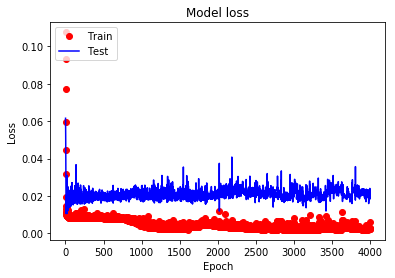

In [130]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', c = "red")
plt.plot(epochs, val_loss, 'b')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Some functions

In [109]:
def plot_prediction(model, test):
    x_test = test[:,0:(test.shape[1]-1)]
    y_predict_test = model.predict(x_test, batch_size = 1)
    y_predict_test.shape = (len(y_predict_test))

    dataset_invert = np.copy(test)
    dataset_invert[:, dataset_invert.shape[1]-1] = y_predict_test
    y_predict_test = scaler.inverse_transform(dataset_invert)[:, dataset_invert.shape[1]-1]
         
    test_tf = scaler.inverse_transform(test)
    x_original = test_tf[:, 0]
    y_original = test_tf[:, test_tf.shape[1]-1]

    plt.scatter(x_original, y_original)
    plt.scatter(x_original, y_predict_test)
    plt.show()

    print(np.corrcoef(y_original, y_predict_test))
    
def plot_training(model, x_t, y_t):  
    y_predict_test = model.predict(x_t, batch_size = 1)
    y_predict_test.shape = (y_predict_test.shape[0],)

    plt.scatter(x_t, y_t)
    plt.scatter(x_t, y_predict_test)
    plt.show()

    np.corrcoef(y_t, y_predict_test)


## Plot predictions epoch 1

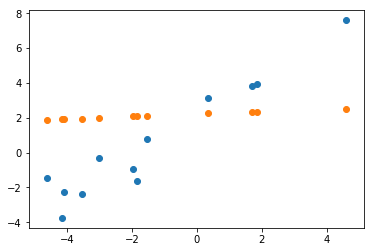

[[1.       0.958985]
 [0.958985 1.      ]]


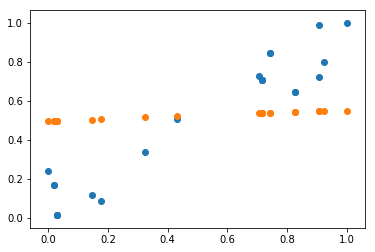

In [131]:
model.load_weights("../../models/train-weights-improvement-01.hdf5")
plot_prediction(model, test)
plot_training(model, x_t, y_t)

   

## Plot predictions best validation Epoch 21

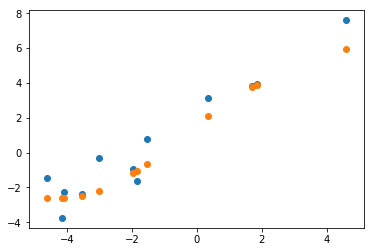

[[1.         0.96415533]
 [0.96415533 1.        ]]


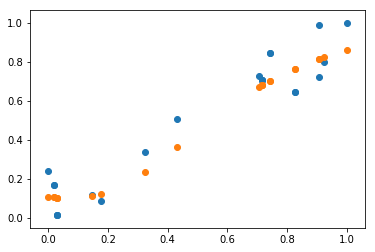

In [135]:
model.load_weights("../../models/val-weights-improvement-21.hdf5")
plot_prediction(model, test)
plot_training(model, x_t, y_t)

## Plot prediction best epoch training, epoch 3513

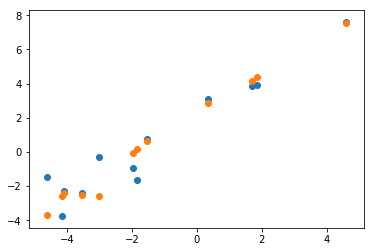

[[1.         0.94066944]
 [0.94066944 1.        ]]


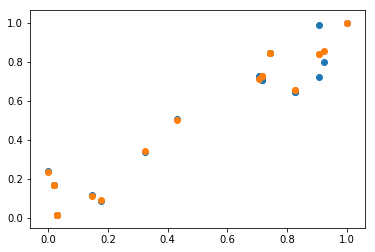

In [133]:
model.load_weights("../../models/train-weights-improvement-3108.hdf5")
plot_prediction(model, test)
plot_training(model, x_t, y_t)